<a href="https://colab.research.google.com/github/orilib/PyTorch/blob/main/PytorchCatsAndDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
!pwd
!ls

/content
sample_data


### Data Exploration


In [ ]:
data_path = 'https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765'
file_name = 'kagglecatsanddogs_3367a.zip'
file_path = 'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

!wget 'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'



--2021-04-11 06:27:51--  https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.229.181
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.229.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811706944 (774M) [application/x-tar]
Saving to: ‘oxford-iiit-pet.tgz’

oxford-iiit-pet.tgz 100%[===================>] 774.10M  13.9MB/s    in 51s     

2021-04-11 06:28:42 (15.2 MB/s) - ‘oxford-iiit-pet.tgz’ saved [811706944/811706944]



In [ ]:
#!ls
!tar zxvf oxford-iiit-pet.tgz

In [ ]:
# !ls ./oxford-iiit-pet/images/

In [ ]:
# remove mat files in the image directory
!rm ./oxford-iiit-pet/images/*.mat

In [ ]:
import os
local_path = './oxford-iiit-pet/images/'
f = [o.name for o in os.scandir(local_path) if o.is_file()]
f[0:5]
type(f)
paths = [local_path+f[i] for i in range(len(f))]
print(paths)
print(len(paths))

['./oxford-iiit-pet/images/Bengal_65.jpg', './oxford-iiit-pet/images/wheaten_terrier_188.jpg', './oxford-iiit-pet/images/British_Shorthair_108.jpg', './oxford-iiit-pet/images/english_setter_177.jpg', './oxford-iiit-pet/images/basset_hound_162.jpg', './oxford-iiit-pet/images/Sphynx_238.jpg', './oxford-iiit-pet/images/scottish_terrier_163.jpg', './oxford-iiit-pet/images/yorkshire_terrier_84.jpg', './oxford-iiit-pet/images/pomeranian_105.jpg', './oxford-iiit-pet/images/saint_bernard_135.jpg', './oxford-iiit-pet/images/great_pyrenees_92.jpg', './oxford-iiit-pet/images/leonberger_11.jpg', './oxford-iiit-pet/images/samoyed_46.jpg', './oxford-iiit-pet/images/Bombay_66.jpg', './oxford-iiit-pet/images/great_pyrenees_109.jpg', './oxford-iiit-pet/images/Bombay_108.jpg', './oxford-iiit-pet/images/american_pit_bull_terrier_86.jpg', './oxford-iiit-pet/images/Abyssinian_230.jpg', './oxford-iiit-pet/images/Ragdoll_180.jpg', './oxford-iiit-pet/images/Ragdoll_125.jpg', './oxford-iiit-pet/images/english_

#### Exploratory data analysis


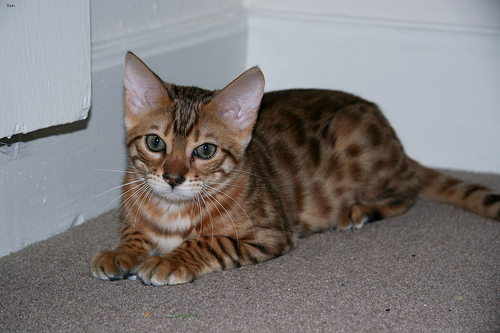

In [ ]:
from PIL import Image
#len(f)
#f[:10]
#img = Image.
img = Image.open(local_path+f[0])  
#img = Image.create(f[2])
# img.show()
display(img)
#img.to_thumb(192)

view images

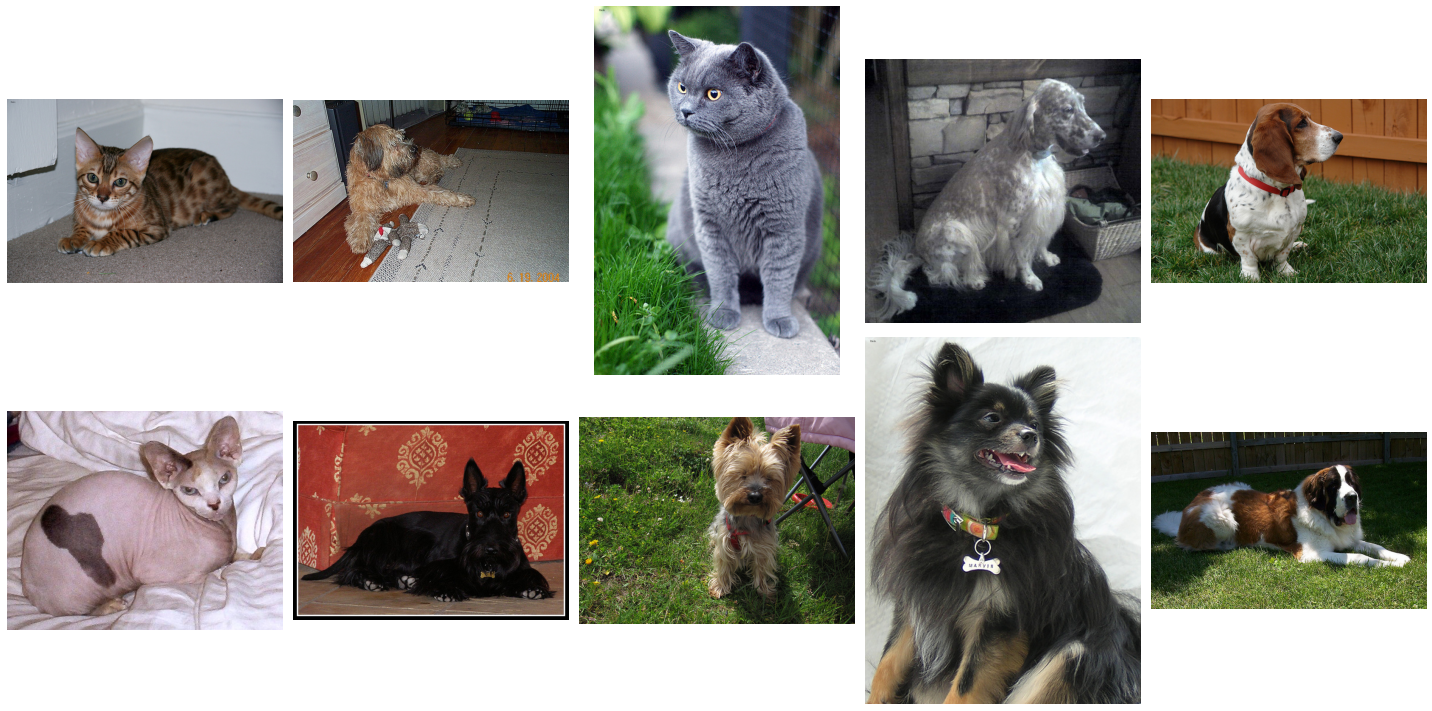

In [ ]:
import matplotlib.pyplot as plt
# # f, axarr = plt.subplots(2,2)
# fig=plt.figure(figsize=(2, 2))
# for i in range(4):
#   img = Image.open(local_path+f[i])
#   fig.add_subplot(2, 2, i)
#   plt.imshow(img)  
#   #axarr[i>>1,i%2].imshow(img)    
# plt.show()
#type(f)
# paths = [local_path+f[i] for i in range(10)]
# print(path)
# images = [Image.open(local_path+f[i]) for i in range(10) ]

fig=plt.figure(figsize=(20, 10))
# fig=plt.figure() #(figsize=(5, 2))

for i in range(10):
    img = Image.open(paths[i])
    # plt.figure()
    fig.add_subplot(2,5,i+1)
    plt.axis('off')
    fig.tight_layout()
    plt.imshow(img)
plt.show()

# for i in range(10):
#   img = Image.open(local_path+f[i])
#   print(img.size)

image value range


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
first = plt.imread(local_path+f[1])
dims = np.shape(first)
np.min(first), np.max(first)

(0, 255)

classed split

In [ ]:
def is_cat(x): return x[0].isupper()
data_set_bal = [is_cat(x) for x in f]
type(data_set_bal)
data_set_bal[0:5]
print("Cats number:", data_set_bal.count(True))
print("Dogs number:", data_set_bal.count(False))

Cats number: 2400
Dogs number: 4990


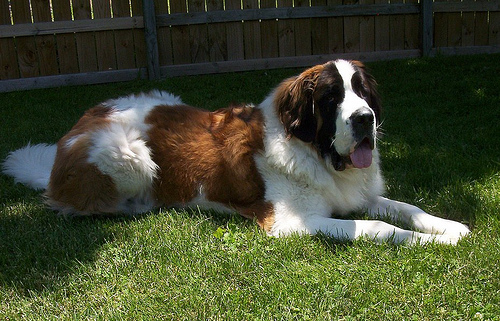

In [ ]:
import torch
Image.open(paths[i])
# torch.tensor(Image.open(paths[i]))
# Cats_tensors = [torch.tensor(Image.open(paths[i])) for i in range(len(paths)) if data_set_bal[i]]

In [ ]:
import cv2
#im1 = cv2.imread(paths[i])
#print(im1)
an_array = np.array(cv2.imread(paths[0]))
print(an_array.shape)
# print(an_array)
# print(paths[0:20])
#x_data = np.array( [np.array(cv2.imread(paths[i])) for i in range(len(paths))] )
x_data2 = np.array( [(cv2.imread(paths[i])) for i in range(len(paths))] )
# print(len(paths))
print(type(x_data2[0]))
print(x_data2[0].shape)
print(x_data2.shape) 
# print(x_data.ndim)
# x_data[0]

(333, 500, 3)
<class 'numpy.ndarray'>
(333, 500, 3)
(7390,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [ ]:
print(x_data2.shape) 

(7390,)


Single image histogram

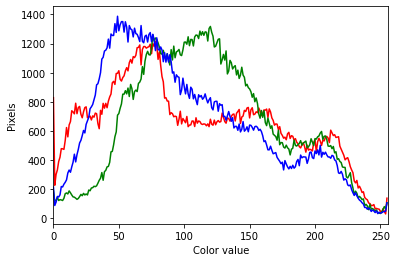

In [ ]:
# Histogram

im1 = cv2.imread(paths[2])
image = im1

# tuple to select colors of each channel line
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

Dataset histogram per class


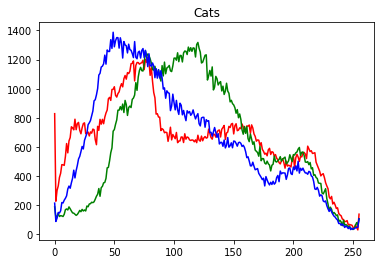

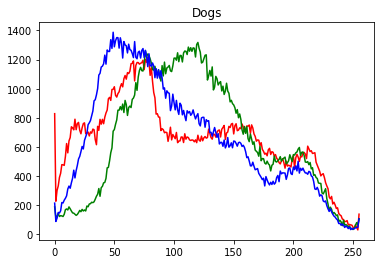

In [ ]:
# historam to each class
from torch import tensor
# type(histogram)
# bin_edges.shape
# bin_edges[:10]

def histogram_image(image_path, channel): 
  # print(image_path)
  #image = cv2.imread(image_path)    
  # print(image)
  if type(image)==None:
    print(type(image))
    print(image_path)
  tmp = np.histogram(image[:, :, channel], bins=256, range=(0, 256))[0]
  
  return tensor(tmp)
  #return 0

#print(paths[0])
# images_histograms = []
#for channel_id, c in zip(channel_ids, colors):    
for i, color in enumerate(("r", "g", "b")):
  images_histograms = [histogram_image(image_pth, i) for image_pth in paths[:1000] if is_cat(image_pth[25:])]
  images_histograms_tens = torch.stack(images_histograms).float().mean(0)
  plt.plot(bin_edges[0:-1], images_histograms_tens, color=color)
  plt.title('Cats')
plt.show()

for i, color in enumerate(("r", "g", "b")):
  images_histograms = [histogram_image(image_pth, i) for image_pth in paths[:1000] if not is_cat(image_pth[25:])]
  images_histograms_tens = torch.stack(images_histograms).float().mean(0)
  plt.plot(bin_edges[0:-1], images_histograms_tens, color=color)
  plt.title('Dogs')
plt.show()

#images_histograms = [histogram_image(image_pth, 0) for image_pth in paths[0:1000] if is_cat(image_pth[25:])]
# len(images_histograms)
#print(images_histograms[0])
# print(type(images_histograms[0]))
# images_histograms_tens = torch.stack(images_histograms).float().mean(0)
#print(type(torch.stack(images_histograms)))
# images_histograms = torch.stack(images_histograms)
# plt.plot(bin_edges[0:-1], images_histograms_tens, color="r")
# plt.plot(bin_edges[0:-1], images_histograms_tens, color="g")
# plt.plot(bin_edges[0:-1], images_histograms_tens, color="b")

# images_tensors = [tensor(Image.open(o)) for o in paths]
# len(images_tensors)
#stacked_sevens = torch.stack(seven_tensors).float()/255


In [ ]:
# len(images_histograms[0])
# print(images_histograms_tens.shape)
# torch.stack(images_histograms).shape
# print(paths[0])
# help(tensor)

print(paths[0])
print(paths[0][25])
# is_cat(paths[1200])

./oxford-iiit-pet/images/Bengal_65.jpg
B


## Data cleaning
### remove not same image types


In [ ]:
def get_paths():
    local_path = './oxford-iiit-pet/images/'
    f = [o.name for o in os.scandir(local_path) if o.is_file()]
    paths = [local_path+f[i] for i in range(len(f))]
    return paths

In [ ]:
# local_path = './oxford-iiit-pet/images/'
# f = [o.name for o in os.scandir(local_path) if o.is_file()]
# paths = [local_path+f[i] for i in range(len(f))]
paths = get_paths()
print(len(paths))
im_pth_types= [(image_pth,type(cv2.imread(image_pth))) for image_pth in paths]
print(im_types[0])
for image_pth,imtype in im_pth_types:
  # if type(image)
  if imtype != im_types[0]:
     print(imtype, image_pth)
     os.remove(image_pth)

7380
<class 'numpy.ndarray'>


### remove not rgb images

In [ ]:
# remove 1/4 channels images
# local_path = './oxford-iiit-pet/images/'
# f = [o.name for o in os.scandir(local_path) if o.is_file()]
# paths = [local_path+f[i] for i in range(len(f))]
paths = get_paths()
print(len(paths))

# im_shapes= [type(cv2.imread(image_pth)) for image_pth in paths]
# img=cv2.imread(paths[3])
# train_files = os.listdir(train_path)

for imgpath in paths:  
  # imgpath = os.path.join(local_path,img_pth)
  # print(imgpath)
  # img=cv2.imread(imgpath)
  img = Image.open(imgpath)
  # if cv2.imread(img_pth).shape[2] != 3:
  if isinstance(img, type(None)):
    print('None type',imgpath)
  # if type(img) == None or type(img) == 'NoneType':
  #   print(imgpath)
  elif len(img.getbands()) != 3:
    print('dims ',imgpath)
    os.remove(imgpath)
  # elif img.shape[2] != 3:
  #   print('single channel',imgpath)
# img.shape

7377


In [ ]:
img=cv2.imread('./oxford-iiit-pet/images/Egyptian_Mau_167.jpg')
# img.show()
type(img)
plt.imshow(img)
print(type(img))
if isinstance(img, type(None)):
  print('yes!')
# if type(img) == class 'NoneType':
#   print('yes!')



AttributeError: ignored

<class 'PIL.GifImagePlugin.GifImageFile'>


{'background': 0, 'duration': 0, 'version': b'GIF89a'}

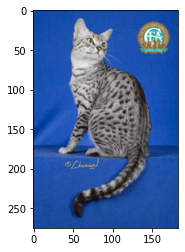

In [ ]:
from matplotlib import cm

img = Image.open('./oxford-iiit-pet/images/Egyptian_Mau_167.jpg')
plt.imshow(img)
print(type(img))
img.info
# np_img = np.array(img).shape
# im = Image.fromarray(np.uint8(cm.gist_earth(np_img)))   
# im.show()

('L',)

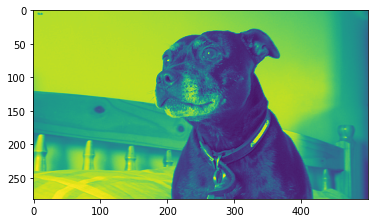

In [ ]:
img = Image.open('./oxford-iiit-pet/images/staffordshire_bull_terrier_2.jpg')
# img = Image.open('./oxford-iiit-pet/images/staffordshire_bull_terrier_23.jpg')
plt.imshow(img)
img.getbands()
# len(img.getbands())
# len(img.size)
# plt.imshow(img)
# pix = np.array(img)
# pix.shape

## Build model


### create dataloader

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

train_path = local_path
train_files = os.listdir(train_path)

class Dataset():
    def __init__(self,filelist,filepath,transform = None):
        self.filelist = filelist
        self.filepath = filepath
        self.transform = transform
    def __len__(self):
        return int(len(self.filelist))
    def __getitem__(self,index):
        imgpath = os.path.join(self.filepath,self.filelist[index])
        img = Image.open(imgpath)
        label = is_cat(self.filelist[index]) 
        if self.transform is not None:
            img = self.transform(img)        
        img = img.numpy()
        if img.shape[0] != 3:
          print('image {}, shape is {}'.format(imgpath, img.shape))
        return (img,label)

data_transform = transforms.Compose([
    transforms.Resize(256),
    # transforms.ColorJitter(),
    transforms.RandomCrop(224),
    #transforms.RandomHorizontalFlip(),
    transforms.Resize(128),
    transforms.ToTensor()
])

# with transform (must because the image sizes varies)
train = Dataset(train_files,train_path, data_transform)
# test = Dataset(test_files,test_path, data_transform_test)
lengths = [int(len(train_files)*0.8), len(train_files)-int(len(train_files)*0.8)]
train_set,val_set = torch.utils.data.random_split(train, lengths, generator=torch.Generator().manual_seed(42))

dataloader = DataLoader(train_set, batch_size=32, shuffle=True, num_workers=0)
dataloader_val = DataLoader(val_set, batch_size=32, shuffle=True, num_workers=0)

In [ ]:
train_files[0:5]
# type(train_files)
# train_path
# img = Image.open(paths[0])
# print(type(img))  
# img = data_transform(img)
# img.shape
# img = img.numpy()
#img
?DataLoader
type(dataloader)

torch.utils.data.dataloader.DataLoader

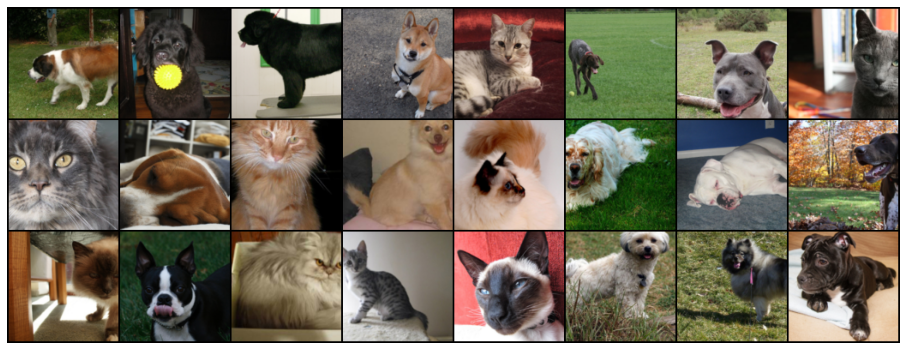

In [ ]:
# see a data loader batch
import torchvision
samples, labels = iter(dataloader).next()
plt.figure(figsize=(16,24)) 
plt.axis('off') 
# plt.grid(False)
grid_imgs = torchvision.utils.make_grid(samples[:24])
np_grid_imgs = grid_imgs.numpy()
# in tensor, image is (batch, width, height), so you have to transpose it to (width, height, batch) in numpy to show it.
plt.imshow(np.transpose(np_grid_imgs, (1,2,0)))

In [ ]:
samples, labels = iter(dataloader).next()
# samples.shape
shapes = [sample.shape for sample in samples]
shapes
# train_set.dataset.filelist[0:5]

In [ ]:
labels.int()

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)

#### Define Model


In [ ]:
#download the pretrained model
import torchvision.models as models
model = models.resnet34(pretrained = True)
# model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
import torch.nn as nn
# add clasifier for 2 classes
num_ftrs =  model.fc.in_features
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 500),
    nn.Linear(500, 2)
)

lr=0.002
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, amsgrad=True)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[500,1000,1500], gamma=0.5)

#### Train

In [ ]:
def train_model(dataloader_train, dataloader_val, epochs=3):
    itr = 1
    p_itr = 20
    model.train()
    total_loss = 0
    loss_list, val_loss_list = [], []
    acc_list, val_acc_list = [], []
    for epoch in range(epochs):
        total_loss = 0
        for samples, labels in dataloader_train: # run over the mini batches
            # get the inputs; data is a list of [inputs, labels]
            samples, labels = samples.to(device), labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            output = model(samples)
            loss = criterion(output, labels.long())
            loss.backward()
            optimizer.step()        
            # scheduler.step()        
            # print statistics evert p_itr iterations
            total_loss += loss.item()
            itr += 1
            if itr % p_itr == 0:
                pred = torch.argmax(output, dim=1)
                correct = pred.eq(labels)
                acc = torch.mean(correct.float())
                print('[Epoch {}/{}] Iteration {} -> Train Loss: {:.4f}, Accuracy: {:.3f}'\
                        .format(epoch+1, epochs, itr, total_loss/p_itr, acc))
                loss_list.append(total_loss/p_itr)
                acc_list.append(acc)
                total_loss = 0
            

        # validation
        total_loss = 0
        for samples, labels in dataloader_val:
            samples, labels = samples.to(device), labels.to(device)
            output = model(samples)
            loss = criterion(output, labels.long())
            # print statistics evert p_itr iterations
            total_loss += loss.item()
            itr += 1                           
            if itr % p_itr == 0:
                pred = torch.argmax(output, dim=1)
                correct = pred.eq(labels)
                acc = torch.mean(correct.float())
                print('[Epoch {}/{}] Iteration {} -> Val Loss: {:.4f}, Accuracy: {:.3f}'\
                .format(epoch+1, epochs, itr, total_loss/p_itr, acc))
                val_loss_list.append(total_loss/p_itr)
                val_acc_list.append(acc)
                total_loss = 0

            
    print('Finished Training')

    plt.plot(loss_list, label='loss')
    plt.plot(acc_list, label='accuracy')
    plt.legend()
    plt.title('training loss and accuracy')
    plt.show()

    plt.plot(val_loss_list, label='loss')
    plt.plot(val_acc_list, label='accuracy')
    plt.legend()
    plt.title('validation loss and accuracy')
    plt.show()

[Epoch 3/3] Iteration 640 -> Train Loss: 0.2306, Accuracy: 0.906
[Epoch 3/3] Iteration 660 -> Val Loss: 0.0988, Accuracy: 0.844
[Epoch 3/3] Iteration 680 -> Val Loss: 0.2539, Accuracy: 0.906

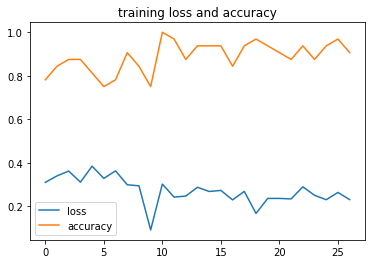

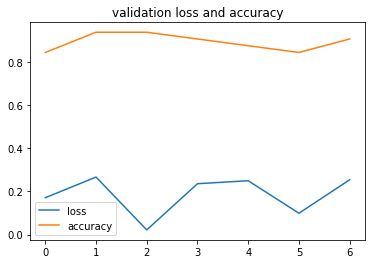

In [ ]:
plt.plot(loss_list, label='loss')
plt.plot(acc_list, label='accuracy')
plt.legend()
plt.title('training loss and accuracy')
plt.show()

plt.plot(val_loss_list, label='loss')
plt.plot(val_acc_list, label='accuracy')
plt.legend()
plt.title('validation loss and accuracy')
plt.show()
# train_model(dataloader, dataloader_val, 3)

In [ ]:
loss

tensor(0.5460, grad_fn=<NllLossBackward>)

In [ ]:
print(torch.cuda.get_device_name(0))
print(torch.cuda.device_count())
# !cat /proc/meminfo
# !cat /proc/cpuinfo

Tesla P100-PCIE-16GB
1


### training with data augmentation

[Epoch 1/3] Iteration 20 -> Train Loss: 0.1919, Accuracy: 0.938
[Epoch 1/3] Iteration 40 -> Train Loss: 0.1957, Accuracy: 0.906
[Epoch 1/3] Iteration 60 -> Train Loss: 0.2275, Accuracy: 0.844
[Epoch 1/3] Iteration 80 -> Train Loss: 0.2298, Accuracy: 0.938
[Epoch 1/3] Iteration 100 -> Train Loss: 0.1997, Accuracy: 0.906
[Epoch 1/3] Iteration 120 -> Train Loss: 0.2294, Accuracy: 0.844
[Epoch 1/3] Iteration 140 -> Train Loss: 0.2545, Accuracy: 0.969
[Epoch 1/3] Iteration 160 -> Train Loss: 0.2550, Accuracy: 0.906
[Epoch 1/3] Iteration 180 -> Train Loss: 0.2455, Accuracy: 0.875
[Epoch 1/3] Iteration 200 -> Val Loss: 0.1642, Accuracy: 0.969
[Epoch 1/3] Iteration 220 -> Val Loss: 0.2212, Accuracy: 0.844
[Epoch 2/3] Iteration 240 -> Train Loss: 0.0851, Accuracy: 0.812
[Epoch 2/3] Iteration 260 -> Train Loss: 0.2147, Accuracy: 0.906
[Epoch 2/3] Iteration 280 -> Train Loss: 0.1912, Accuracy: 0.906
[Epoch 2/3] Iteration 300 -> Train Loss: 0.1810, Accuracy: 0.938
[Epoch 2/3] Iteration 320 -> Trai

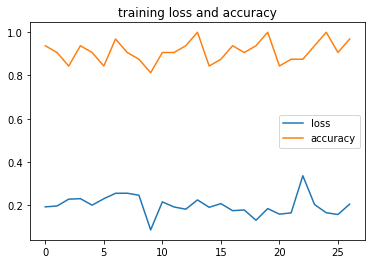

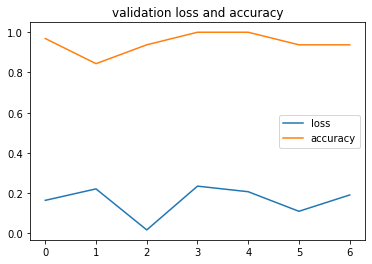

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.ColorJitter(),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(128),
    transforms.ToTensor()
])

# with transform (must because the image sizes varies)
train = Dataset(train_files,train_path, data_transform)
lengths = [int(len(train_files)*0.8), len(train_files)-int(len(train_files)*0.8)]
train_set,val_set = torch.utils.data.random_split(train, lengths, generator=torch.Generator().manual_seed(42))

dataloader_train = DataLoader(train_set, batch_size=32, shuffle=True, num_workers=0)
dataloader_val = DataLoader(val_set, batch_size=32, shuffle=True, num_workers=0)

train_model(dataloader_train, dataloader_val, 3)

error rate 6.2%

concluison -> same error rate as on FastAI

In [ ]:
PATH = './cats_and_dogs_net.pth'
torch.save(model.state_dict(), PATH)

## See the results

In [ ]:
#load the model
net = model
net.load_state_dict(torch.load(PATH))

In [ ]:
dataiter = iter(dataloader_val)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
outputs = net(images)
print('Predicted: ', ' '.join('%5s' % ["Dog","Cat"][output]
                              for output in outputs))